# CSE 151 Spring 2023 - Final Project

## Dijkstra Visualization within OSPF

### - Brian Huang, Parin Patel


This python program that simluates OSPF and IS-IS routing protocols by using a visual represention of Dijkstra's algorithm. We will be visually represent a simulation of a network topology.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

Here we are importing some necessary libraries that we are going to use to help us visualize and animate the use of Dijkstra's Algorithm in OSPF.

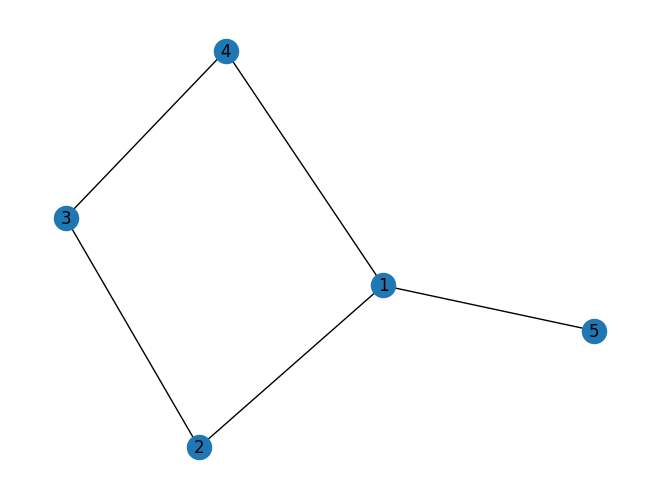

In [ ]:
#Test Graph/Network
t = nx.Graph()

#Adding Edges Between Nodes.
t.add_edge(1, 2)
t.add_edge(2, 3)
t.add_edge(3, 4)
t.add_edge(1, 4)
t.add_edge(1, 5)
 
#Drawing the Network
nx.draw(t, with_labels = True)

# Show the plot in other environments
plt.show()

In the picture above, we can imagine each "node" as a router and each "edge" between the nodes a link between the routers. Routers will be distiguished by numbers. We will continue to use this illustration throughout the python notebook. The "graph" will be considered as the network.



#Network Topology
The next illustration will be the network topology we use to demonstrate Dijkstra's Algorithm in OSPF. 

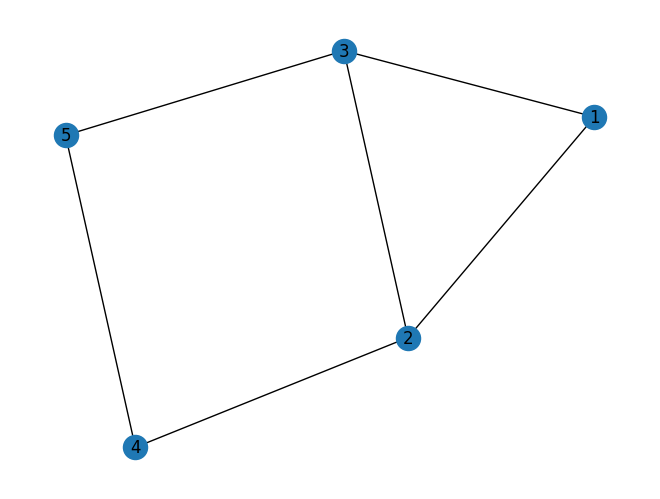

In [ ]:
# Create the graph
g1 = nx.Graph()

# Add the edges to the graph
g1.add_edge(1, 2)
g1.add_edge(1, 3)
g1.add_edge(2, 3)
g1.add_edge(2, 4)
g1.add_edge(3, 5)
g1.add_edge(4, 5)
 
# Draw the graph
nx.draw(g1, with_labels = True)

# Show the plot in other environments
plt.show()

Assuming the cost of all the links between the routers have the same cost of 1, The shortest path from Router 1 to Router 5 would be via Router 3. Obviously we can see there is no other path that would cost 2. Going through Router 2 would result in a path that costs at least 3.

#NetworkX Shortest Path 
The networkx library already has a built in way of finding the shortest path between two nodes. 



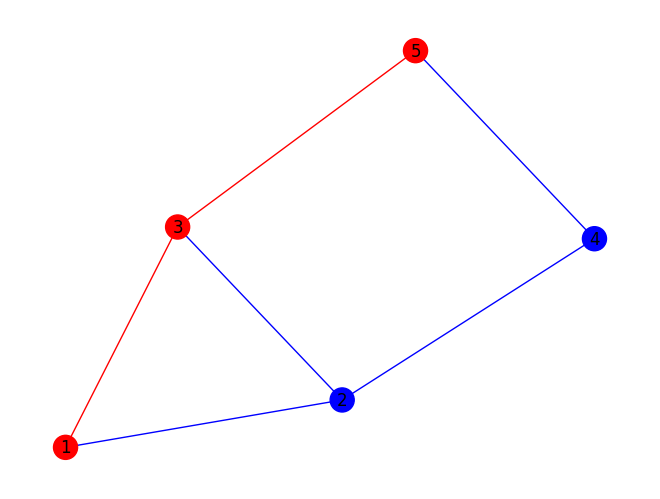

In [ ]:
# Find the shortest path from node 1 to node 5
shortest_path = nx.shortest_path(g1, 1, 5)

# Create a list of colors for each node. 
# Nodes in the shortest path are highlighted with a different color
node_colors = ["red" if n in shortest_path else "blue" for n in g1.nodes()]

# Similarly, create a list of colors for each edge.
# Edges in the shortest path are highlighted with a different color
edge_colors = ["red" if edge in list(zip(shortest_path, shortest_path[1:])) or edge in list(zip(shortest_path[1:], shortest_path)) else "blue" for edge in g1.edges()]

# Now draw the graph
nx.draw(g1, with_labels=True, node_color=node_colors, edge_color=edge_colors)

# Show the plot in other environments
plt.show()



As we can see, the function shortest_path calculates the shortest path from Router 1 to Router 5. We highlight the shortest path in red and everything else in blue.

The proper use of this function is:

    shortest_path = nx.shortest_path(Graph, source, destination)

# So, How does the OSPF protocol implement Dijkstra's Algorithm ?

> 


Let's say we have this graph, the algorithm will create a shortest path from node 0 to all other nodes in this system. 


---


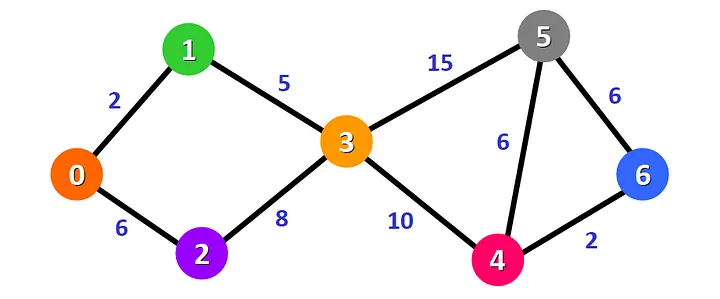

To start, the distance from a source node to itself will always be zero (in our case the source node is 0), but because the distance between the other nodes are undefined. 

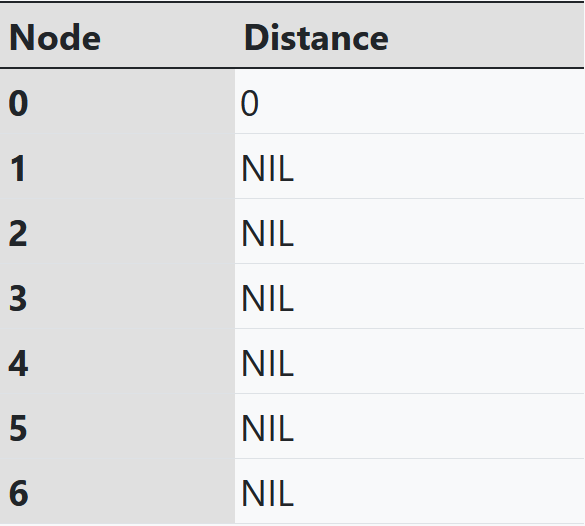

Additionally, there is a list to keep track of nodes that are not visited. 
__Unvisited__: {0, 1, 2, 3, 4, 5, 6}

Once we start searching, starting from the source node (node 0 in this case), the paths with become discovered. 

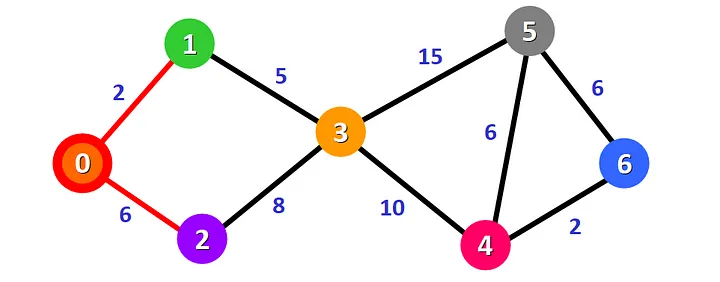

Thus, the distance table will get updated. 

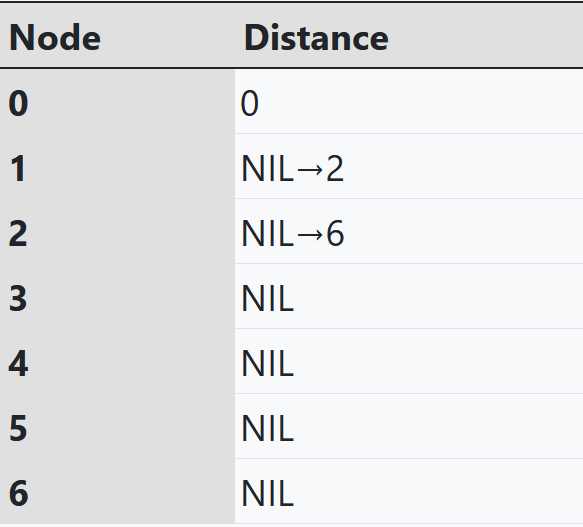


__Unvisited__: {2, 3, 4, 5, 6}

This algorthim will keep running until we have the shortest path from node 0 to each node in the graph. 

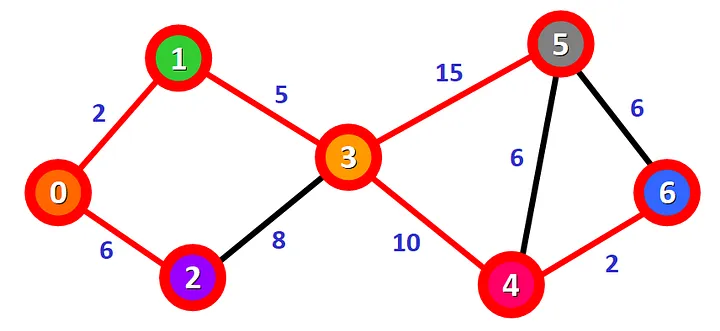

And our table looks like this: 

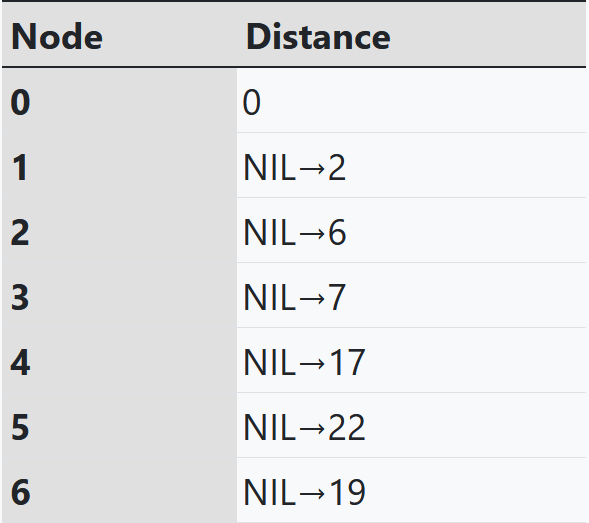

The list of unvisited nodes should be empty. __Unvisited Nodes__ {NIL}

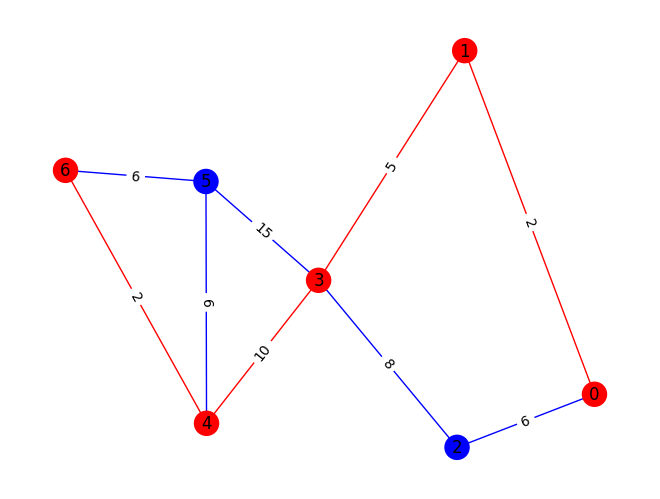

In [ ]:
g3 = nx.Graph()

# Define the edges and their weights
edges = [
    (0, 1, {'weight': 2}),
    (0, 2, {'weight': 6}),
    (2, 3, {'weight': 8}),
    (1, 3, {'weight': 5}),
    (3, 5, {'weight': 15}),
    (3, 4, {'weight': 10}),
    (4, 5, {'weight': 6}),
    (4, 6, {'weight': 2}),
    (5, 6, {'weight': 6}),  # to create a cycle
]

# Add the edges to the graph
g3.add_edges_from(edges)

# Find the shortest path from node 0 to node 6 using Dijkstra's algorithm
shortest_path = nx.dijkstra_path(g3, 0, 6, weight='weight')

# Create a list of colors for each node. 
# Nodes in the shortest path are highlighted with a different color
node_colors = ["red" if n in shortest_path else "blue" for n in g3.nodes()]

# Similarly, create a list of colors for each edge.
# Edges in the shortest path are highlighted with a different color
edge_colors = ["red" if edge in list(zip(shortest_path, shortest_path[1:])) or edge in list(zip(shortest_path[1:], shortest_path)) else "blue" for edge in g3.edges()]

# Draw the graph
pos = nx.spring_layout(g3)
nx.draw(g3, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors)
labels = nx.get_edge_attributes(g3, 'weight')
nx.draw_networkx_edge_labels(g3, pos, edge_labels=labels)

# Show the plot
plt.show()

# **Our Visualization and Implementation**

Of course this is easy to visualize when there are only so many routers and the cost between each are the same. For the next example, we will demonstrate the shortest path in a network with 10 routers and equal costs on each link. We will first construct a network with 10 routers with varying links between the routers.

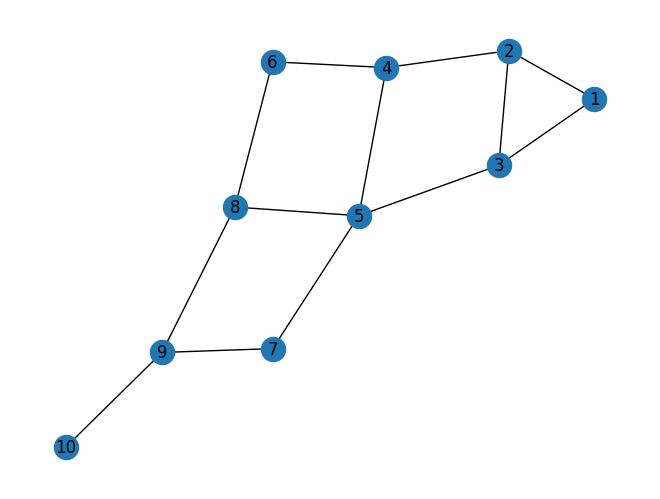

In [ ]:
g2 = nx.Graph()

g2.add_edge(1, 2)
g2.add_edge(1, 3)
g2.add_edge(2, 3)
g2.add_edge(2, 4)
g2.add_edge(3, 5)
g2.add_edge(5, 4)
g2.add_edge(4, 6)
g2.add_edge(5, 7)
g2.add_edge(5, 8)
g2.add_edge(6, 8)
g2.add_edge(8, 9)
g2.add_edge(7, 9)
g2.add_edge(9, 10)

nx.draw(g2, with_labels = True)

plt.show()

Now that we have made the graph, we will find the shortest path between Router 1 and Router 10.

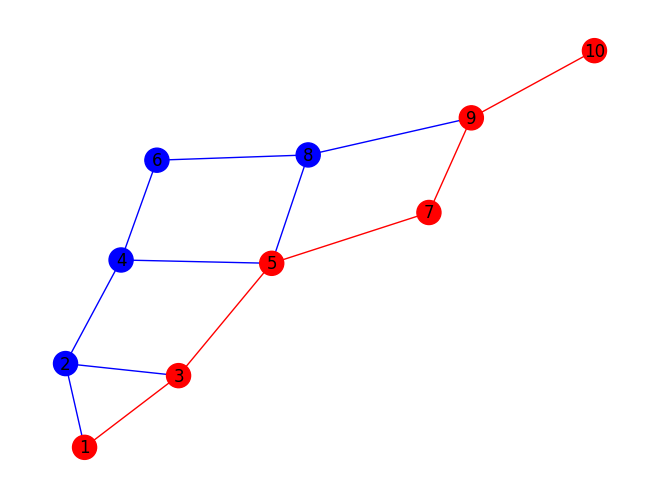

In [ ]:
shortest_path = nx.shortest_path(g2, 1, 10)

node_colors = ["red" if n in shortest_path else "blue" for n in g2.nodes()]

edge_colors = ["red" if edge in list(zip(shortest_path, shortest_path[1:])) or edge in list(zip(shortest_path[1:], shortest_path)) else "blue" for edge in g2.edges()]

nx.draw(g2, with_labels=True, node_color=node_colors, edge_color=edge_colors)

plt.show()

In this case, getting from Router 1 to Router 10 has two shortest paths. The first, is shown above, 1➔3➔5➔7➔9➔10, but because all these routers in this network have the same  cost metric, another path could be 1➔3➔5➔8➔9➔10. Below, is what a network would look like if we assigned a cost metric to each of the links. 

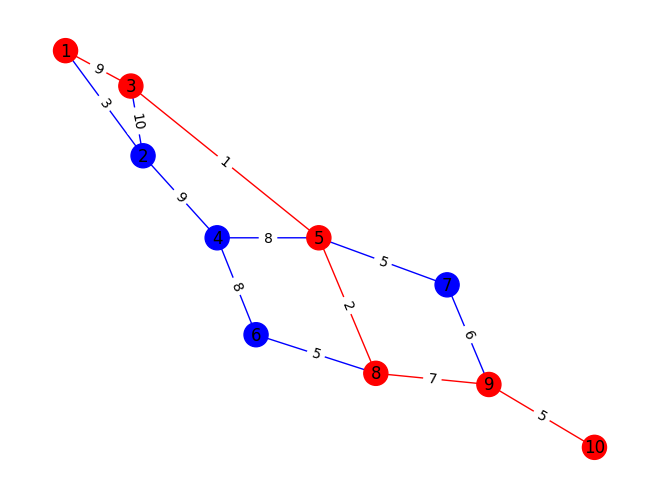

In [ ]:
# Define the edges and their weights
edges = [
    (1, 2, {'weight': random.randint(1, 10)}),
    (1, 3, {'weight': random.randint(1, 10)}),
    (2, 3, {'weight': random.randint(1, 10)}),
    (2, 4, {'weight': random.randint(1, 10)}),
    (3, 5, {'weight': random.randint(1, 10)}),
    (5, 4, {'weight': random.randint(1, 10)}),
    (4, 6, {'weight': random.randint(1, 10)}),
    (5, 7, {'weight': random.randint(1, 10)}),
    (5, 8, {'weight': random.randint(1, 10)}),
    (6, 8, {'weight': random.randint(1, 10)}),
    (8, 9, {'weight': random.randint(1, 10)}),
    (7, 9, {'weight': random.randint(1, 10)}),
    (9, 10, {'weight': random.randint(1, 10)}),# to create a cycle
]

# Add the edges to the graph
g2.add_edges_from(edges)

# Find the shortest path from node 1 to node 10
shortest_path = nx.dijkstra_path(g2, 1, 10, weight='weight')

# Create a list of colors for each node. 
# Nodes in the shortest path are highlighted with a different color
node_colors = ["red" if n in shortest_path else "blue" for n in g2.nodes()]

# Similarly, create a list of colors for each edge.
# Edges in the shortest path are highlighted with a different color
edge_colors = ["red" if edge in list(zip(shortest_path, shortest_path[1:])) or edge in list(zip(shortest_path[1:], shortest_path)) else "blue" for edge in g2.edges()]

# Draw the graph
pos = nx.spring_layout(g2)
nx.draw(g2, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors)
labels = nx.get_edge_attributes(g2, 'weight')
nx.draw_networkx_edge_labels(g2, pos, edge_labels=labels)

# Show the plot
plt.show()

If we look closely at the code in the code box above, we find this on line 22:

    shortest_path = nx.dijkstra_path(g2, 1, 10, weight='weight')

This line of code finds the shortest path from Router 1 to Router 10 using Dijkstra's Algorithm and sets it in a shortest_path variable. **'weight'** in this case would be the random weights assigned to each link. Since these are random weights, the path will be different because the links will have a different weight.

#Conclusion

Now you have a great understanding of how Dijkstra's Algorithm is used in the OSPF routing protocol!